In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Display basic statistics of the dataset
print(data.describe())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mea

In [4]:
# Convert categorical variables to numeric
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0})

In [5]:
# Define features and target variable
X = data.drop(['price'], axis=1)
y = data['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)


In [9]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1771751116594.0352
R^2 Score: 0.6494754192267803


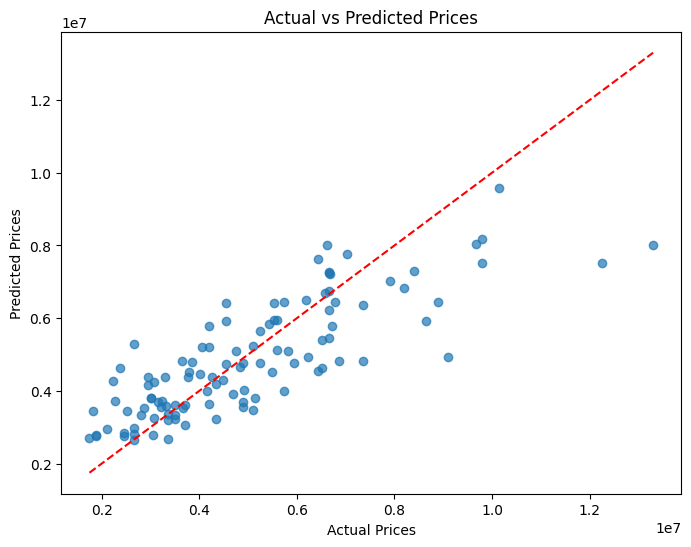

In [10]:
# Plotting Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

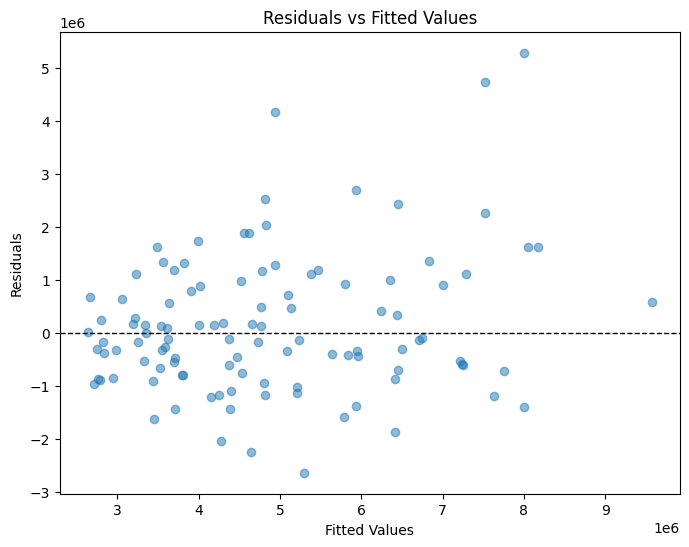

In [11]:
# Additional Visualization: Residuals without lowess
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', lw=1)  # Add a horizontal line at 0
plt.show()


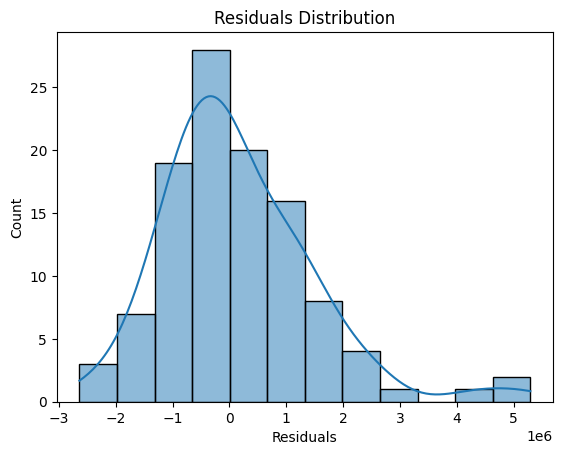

In [12]:
# Residual plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

In [14]:
def predict_price():
    # Collect input from the user
    area = float(input("Enter area (in sq ft): "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))
    stories = int(input("Enter number of stories: "))
    mainroad = int(input("Is it on the main road? (1 for yes, 0 for no): "))
    guestroom = int(input("Is there a guest room? (1 for yes, 0 for no): "))
    basement = int(input("Is there a basement? (1 for yes, 0 for no): "))
    hotwaterheating = int(input("Is there hot water heating? (1 for yes, 0 for no): "))
    airconditioning = int(input("Is there air conditioning? (1 for yes, 0 for no): "))
    parking = int(input("Enter number of parking spaces: "))
    prefarea = int(input("Is it in a preferred area? (1 for yes, 0 for no): "))
    furnishingstatus = float(input("Enter furnishing status (1 for furnished, 0.5 for semi-furnished, 0 for unfurnished): "))

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'mainroad': [mainroad],
        'guestroom': [guestroom],
        'basement': [basement],
        'hotwaterheating': [hotwaterheating],
        'airconditioning': [airconditioning],
        'parking': [parking],
        'prefarea': [prefarea],
        'furnishingstatus': [furnishingstatus]
    })

    # Predict the price
    predicted_price = model.predict(input_data)
    print(f"Predicted House Price: {predicted_price[0]}")

# Call the prediction function
predict_price()

Enter area (in sq ft):  2000
Enter number of bedrooms:  3
Enter number of bathrooms:  2
Enter number of stories:  1
Is it on the main road? (1 for yes, 0 for no):  0
Is there a guest room? (1 for yes, 0 for no):  1
Is there a basement? (1 for yes, 0 for no):  1
Is there hot water heating? (1 for yes, 0 for no):  1
Is there air conditioning? (1 for yes, 0 for no):  1
Enter number of parking spaces:  2
Is it in a preferred area? (1 for yes, 0 for no):  1
Enter furnishing status (1 for furnished, 0.5 for semi-furnished, 0 for unfurnished):  1


Predicted House Price: 6782114.910051862


In [ ]:
def predict_price_partial():
    # Default values
    default_area = 1500  # Average area (in sq ft)
    default_bedrooms = 3
    default_bathrooms = 2
    default_stories = 1
    default_mainroad = 0
    default_guestroom = 0
    default_basement = 0
    default_hotwaterheating = 0
    default_airconditioning = 0
    default_parking = 1
    default_prefarea = 0
    default_furnishingstatus = 0.5  # Semi-furnished
    
    # Collect input from the user with option to skip
    area = input(f"Enter area (in sq ft) or press enter for default ({default_area}): ")
    area = float(area) if area else default_area
    
    bedrooms = input(f"Enter number of bedrooms or press enter for default ({default_bedrooms}): ")
    bedrooms = int(bedrooms) if bedrooms else default_bedrooms
    
    bathrooms = input(f"Enter number of bathrooms or press enter for default ({default_bathrooms}): ")
    bathrooms = int(bathrooms) if bathrooms else default_bathrooms
    
    stories = input(f"Enter number of stories or press enter for default ({default_stories}): ")
    stories = int(stories) if stories else default_stories
    
    mainroad = input(f"Is it on the main road? (1 for yes, 0 for no) or press enter for default ({default_mainroad}): ")
    mainroad = int(mainroad) if mainroad else default_mainroad
    
    guestroom = input(f"Is there a guest room? (1 for yes, 0 for no) or press enter for default ({default_guestroom}): ")
    guestroom = int(guestroom) if guestroom else default_guestroom
    
    basement = input(f"Is there a basement? (1 for yes, 0 for no) or press enter for default ({default_basement}): ")
    basement = int(basement) if basement else default_basement
    
    hotwaterheating = input(f"Is there hot water heating? (1 for yes, 0 for no) or press enter for default ({default_hotwaterheating}): ")
    hotwaterheating = int(hotwaterheating) if hotwaterheating else default_hotwaterheating
    
    airconditioning = input(f"Is there air conditioning? (1 for yes, 0 for no) or press enter for default ({default_airconditioning}): ")
    airconditioning = int(airconditioning) if airconditioning else default_airconditioning
    
    parking = input(f"Enter number of parking spaces or press enter for default ({default_parking}): ")
    parking = int(parking) if parking else default_parking
    
    prefarea = input(f"Is it in a preferred area? (1 for yes, 0 for no) or press enter for default ({default_prefarea}): ")
    prefarea = int(prefarea) if prefarea else default_prefarea
    
    furnishingstatus = input(f"Enter furnishing status (1 for furnished, 0.5 for semi-furnished, 0 for unfurnished) or press enter for default ({default_furnishingstatus}): ")
    furnishingstatus = float(furnishingstatus) if furnishingstatus else default_furnishingstatus

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'mainroad': [mainroad],
        'guestroom': [guestroom],
        'basement': [basement],
        'hotwaterheating': [hotwaterheating],
        'airconditioning': [airconditioning],
        'parking': [parking],
        'prefarea': [prefarea],
        'furnishingstatus': [furnishingstatus]
    })

    # Predict the price
    predicted_price = model.predict(input_data)
    print(f"Predicted House Price: {predicted_price[0]}")

# Call the partial prediction function
predict_price_partial()


Enter area (in sq ft) or press enter for default (1500):  2000
Enter number of bedrooms or press enter for default (3):  
Enter number of bathrooms or press enter for default (2):  2
Enter number of stories or press enter for default (1):  
Is it on the main road? (1 for yes, 0 for no) or press enter for default (0):  0
Is there a guest room? (1 for yes, 0 for no) or press enter for default (0):  
Is there a basement? (1 for yes, 0 for no) or press enter for default (0):  
Is there hot water heating? (1 for yes, 0 for no) or press enter for default (0):  1
Is there air conditioning? (1 for yes, 0 for no) or press enter for default (0):  1
